> Copyright 2025 Giovanni Squillero <<giovanni.squillero@polito.it>>  
> SPDX-License-Identifier: `0BSD`

In [22]:
import random
from itertools import accumulate
from functools import lru_cache

import numpy as np
from tqdm.autonotebook import tqdm
from matplotlib import pyplot as plt

/var/folders/31/dkl97hks2c14b663vl55pt440000gn/T/ipykernel_3279/4004453689.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [23]:
def augmented(func):
    class _Augmnented:
        _log: list

        def __init__(self):
            self.clear()

        @property
        def log(self):
            return self._log[:]

        def clear(self):
            self._log = list()

        def plot(self, figsize=(14, 8)):
            best = list(accumulate(self._log, max))
            improvements = [(i, v) for i, v in list(enumerate(best)) if v > best[i - 1]]
            plt.figure(figsize=figsize)
            plt.scatter(range(len(self._log)), self._log, marker='.', color='lavender')
            plt.plot(range(len(best)), best, color='lightcoral')
            plt.scatter(
                [i for i, v in improvements],
                [v for i, v in improvements],
                marker='*',
                color='red',
            )

        @lru_cache(maxsize=4096)
        def __call__(self, *args, **kwargs):
            self._log.append(func(*args, **kwargs))
            return self.log[-1]

    return _Augmnented()

# 0-1 Multiple Knapsack Problem

see: [https://en.wikipedia.org/wiki/Knapsack_problem](https://en.wikipedia.org/wiki/Knapsack_problem)

In [24]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [69]:
NUM_ITEMS = 500
DIMENSIONS = 100
MAX_STEPS = 500_000

WEIGHTS = np.random.randint(1, 50 + 1, size=(NUM_ITEMS, DIMENSIONS))
MAX_WEIGHTS = np.full(DIMENSIONS, NUM_ITEMS * 20)
VALUES = np.random.randint(1, 100 + 1, size=NUM_ITEMS)

In [70]:
def evaluate(knapsack):
    if all(np.sum(WEIGHTS[knapsack], axis=0) <= MAX_WEIGHTS):
        return np.sum(VALUES[knapsack])
    else:
        return -1


@augmented
def fitness(solution):
    solution = list(solution)
    if all(np.sum(WEIGHTS[solution], axis=0) <= MAX_WEIGHTS):
        return np.sum(VALUES[solution])
    else:
        knapsack_weight = np.sum(WEIGHTS[solution], axis=0)
        return -np.sum(knapsack_weight[knapsack_weight > MAX_WEIGHTS])

## Local search (hill-climbing) 
### Random strength tweak

In [71]:
def tweak(solution, p):
    solution = list(solution)
    i = random.randint(0, len(solution) - 1)
    solution[i] = not solution[i]
    while random.random() < p:
        i = random.randint(0, len(solution) - 1)
        solution[i] = not solution[i]
    return tuple(solution)

  0%|          | 0/500000 [00:00<?, ?it/s]

Solution found in 500,000 tries: 23,836


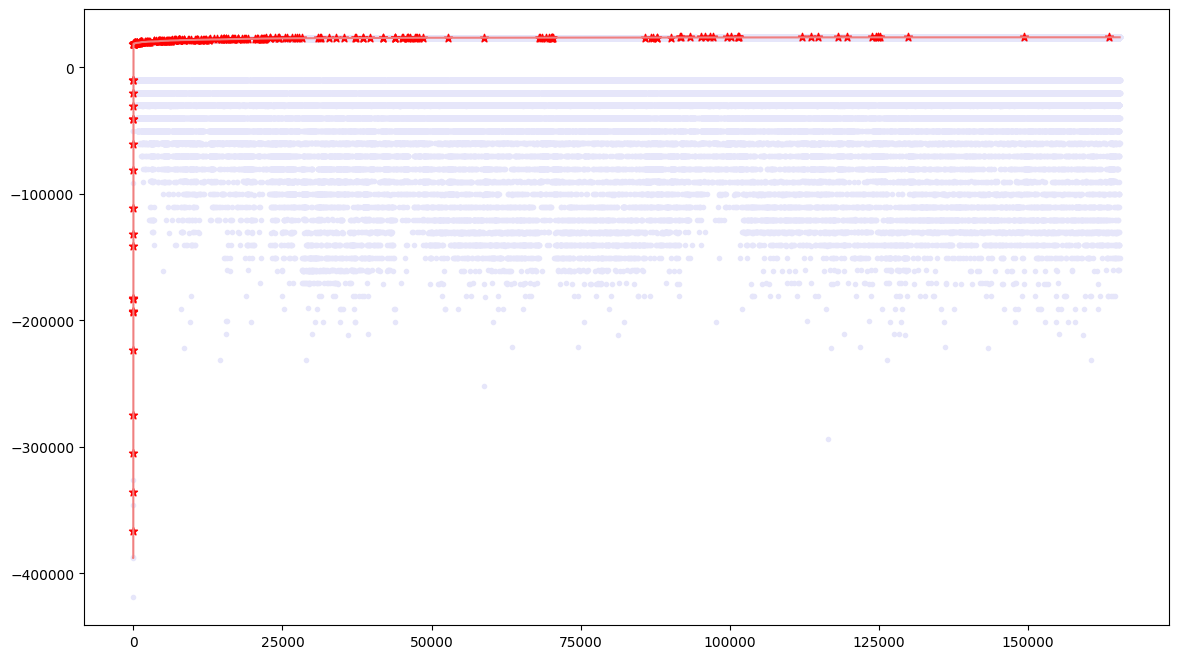

In [ ]:
tries = 0
fitness.clear()

best_solution = tuple(random.choice([True, True, True, True, False]) for _ in range(NUM_ITEMS))
for tries in tqdm(range(MAX_STEPS)):
    solution = tweak(best_solution, 0.25)
    if fitness(solution) > fitness(best_solution):
        best_solution = solution[:]

print(f"Solution found in {1+tries:,} tries: {evaluate(list(best_solution)):,}")
fitness.plot()

In [82]:
fitness.clear()

tries = 0
fitness.clear()
strength = 0
with tqdm(total=MAX_STEPS/10) as pbar:
    best_solution = tuple(random.choice([True, True, True, True, False]) for _ in range(NUM_ITEMS))
    while tries < MAX_STEPS/10:
        steady_state = 0
        while steady_state < 100:
            tries += 1
            pbar.update(1)
            steady_state += 1
            solution = tweak(best_solution, strength)
            if fitness(solution) > fitness(best_solution):
                steady_state = 0
                best_solution = solution[:]
            if tries >= MAX_STEPS/10:
                break
        strength = (9 * strength + 1) / 10

print(f"Solution found in {tries:,} tries: {evaluate(list(best_solution)):,}")

fitness.plot()

  0%|          | 0/50000.0 [00:00<?, ?it/s]

KeyboardInterrupt: 